In [2]:
%load_ext autoreload
%autoreload 2
#existing packages
import numpy as np
import matplotlib.pyplot as plt
import pickle

#.py
from core import prices as pr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Double Q-learning

In [3]:
# Path to the pickle file
pickle_file_path = '/Volumes/OS-Data/Suzie_data/RLandPricing/data/data_dQ.pkl'

# Open the file in binary read mode
with open(pickle_file_path, 'rb') as file:
    aggregated_agents = pickle.load(file)

# Now, "aggregated_agents" contains the object saved in the pickle file
print(aggregated_agents)

[array([[[0.25684852, 0.39907843],
        [0.21894718, 0.21894718],
        [0.33167768, 0.11990343],
        ...,
        [0.29421414, 0.19161785],
        [0.24367931, 0.36767725],
        [0.23254261, 0.25222441]],

       [[0.20854879, 0.26588642],
        [0.36764107, 0.20231907],
        [0.29256439, 0.32384622],
        ...,
        [0.17014698, 0.3191    ],
        [0.20277711, 0.21706746],
        [0.18222362, 0.27238067]],

       [[0.2774723 , 0.38740429],
        [0.33672624, 0.33672624],
        [0.23089762, 0.30318062],
        ...,
        [0.16303351, 0.29569084],
        [0.20077286, 0.23170842],
        [0.22006659, 0.28502892]],

       ...,

       [[0.33672624, 0.33672624],
        [0.32866262, 0.18893341],
        [0.32017985, 0.24093356],
        ...,
        [0.18127001, 0.30712217],
        [0.1642367 , 0.352927  ],
        [0.20231907, 0.36764107]],

       [[0.37460486, 0.29817408],
        [0.35000005, 0.25814065],
        [0.19013621, 0.25949508],
        

/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_4781/1109934844.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


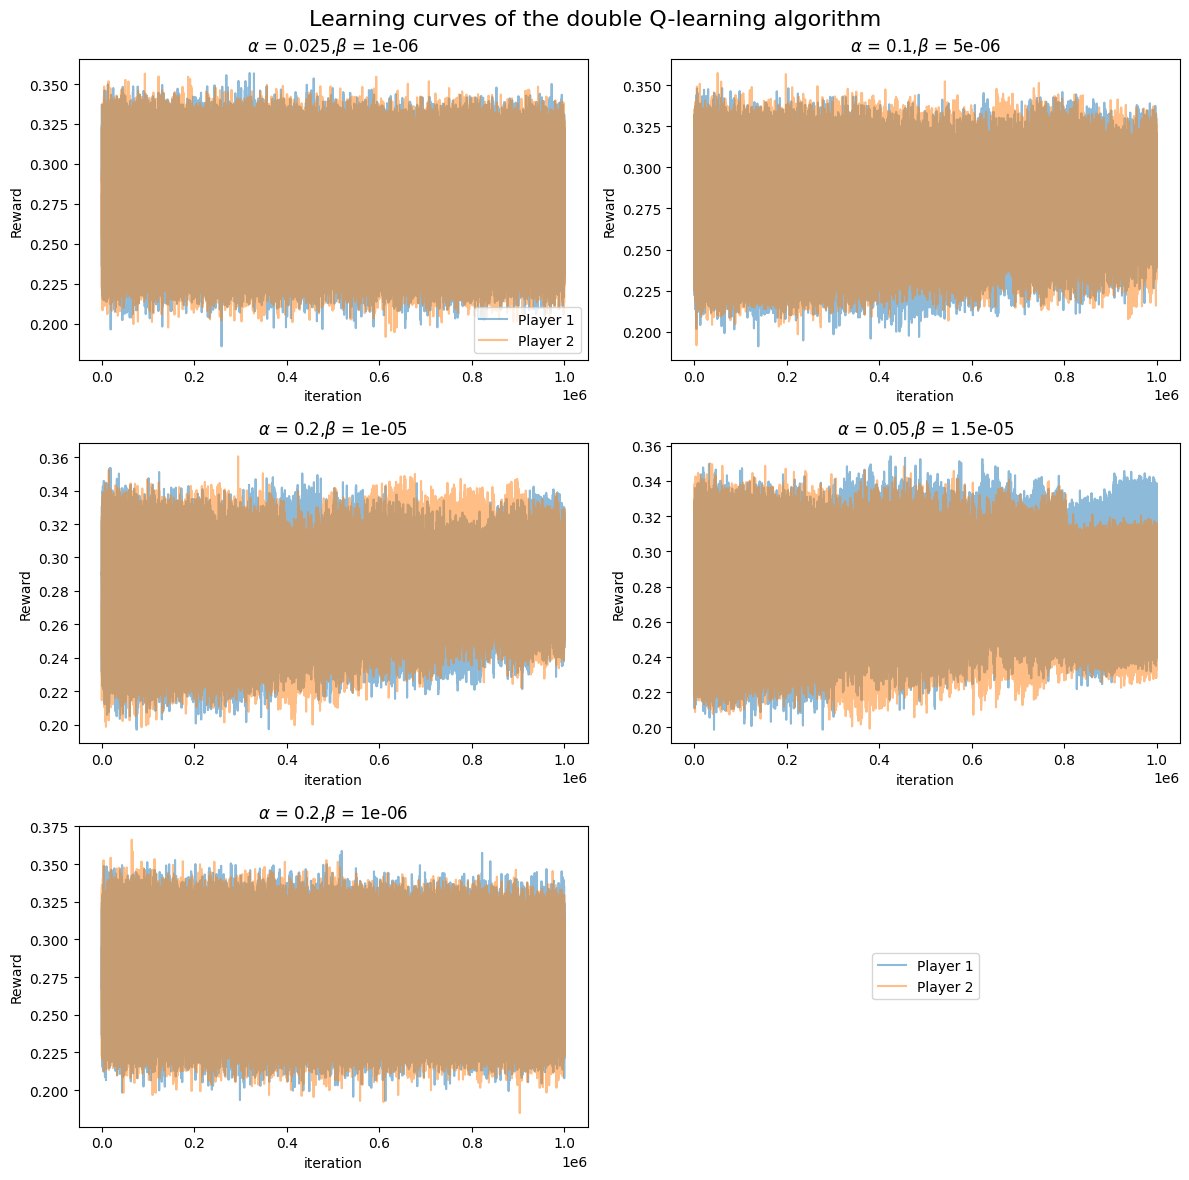

In [5]:
agg = np.array(aggregated_agents).mean(axis=1)
num_players = 2
num_graphs = len(agg)
rep = [[0.025,10**(-6)],[0.1,0.5*10**(-5)],[0.2,10**(-5)],[0.05,1.5*10**(-5)],[0.2,10**(-6)]]

# Create a figure with a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Loop to iterate through the periods and subplots
for graph_num in range(num_graphs):
    ax = axes[graph_num]
    num_players = len(agg[graph_num][0])
    # Plot curves for each player in the subplot
    for player in range(num_players):
        ax.plot(agg[graph_num][:, player], alpha=0.5, label=f'Player {player + 1}')
    
    # Set the title of the subplot with the corresponding period
    ax.set_title(f'$\\alpha$ = {rep[graph_num][0]},$\\beta$ = {round(rep[graph_num][1],8)}')
    
    # Set the labels of the subplot
    ax.set_xlabel('iteration')
    ax.set_ylabel('Reward')

    # Add a legend to the first subplot
    if graph_num == 0:
        ax.legend()

# Remove any unused subplots
if num_graphs < 5:
    for i in range(num_graphs, 5):
        fig.delaxes(axes[i])

# Create a legend in the last subplot
legend_ax = axes[-1]
legend_ax.axis('off')

# Get the legend handles and labels from the first subplot
handles, labels = axes[0].get_legend_handles_labels()

# Create the legend in the last subplot
legend_ax.legend(handles, labels, loc='center')


fig.suptitle('Learning curves of the double Q-learning algorithm', fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [4]:
prices = pr.PriceOptimizer()
collusion_profit, collusion_prices = prices.CollusionPrice()
nash_profit, nash_prices = prices.NashPrice()
RN = nash_profit
RC = collusion_profit
    
Rmean = np.zeros((len(aggregated_agents), 2))
DRmean = np.zeros((len(aggregated_agents), 2))   
    
for i in range (len(aggregated_agents)): 
    for j in range (2):
        Rmean[i][j] = aggregated_agents[i][-100:,j].mean()
        DRmean[i][j] = (Rmean[i][j] - RN)/(RC - RN) 

print(DRmean)

[[0.47270121 0.47335615]
 [0.44172241 0.53747051]
 [0.38797883 0.45755522]
 [0.46553879 0.48982683]
 [0.46844616 0.44457168]]


[0.47302868 0.48959646 0.42276703 0.47768281 0.45650892]


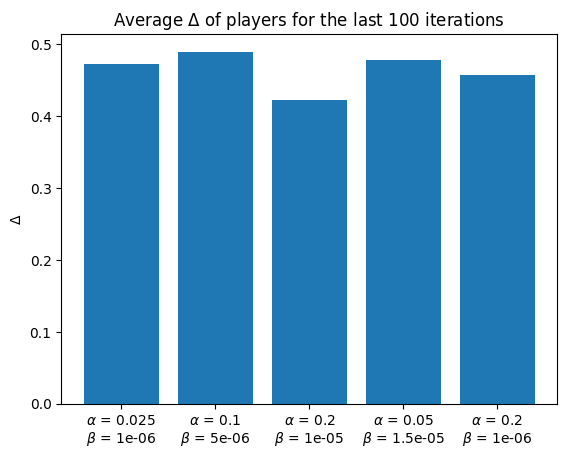

In [5]:
av = np.mean(DRmean, axis=1)
print(av)
fig.set_size_inches(8, 16)
plt.bar([f'$\\alpha$ = {rep[graph_num][0]}\n$\\beta$ = {round(rep[graph_num][1],8)}' for graph_num 
         in range(len(rep))],av)
plt.ylabel('$\\Delta$')
plt.title('Average $\\Delta$ of players for the last 100 iterations')
plt.show()